In [1]:
import vehicles as v
from graphviz import Source, render

In [2]:
#Create manager that holds the threshold device
mng = v.manager(verbose = True)
#Create an input node
sns1 = v.sensor(mng,(1,1))
sns2 = v.sensor(mng,(1,1))
#Create threshold nodes
t1 = v.threshold(mng,1)
t2 = v.threshold(mng,1)
#Create output node/actuator
out1 = v.actuator(mng)
out2 = v.actuator(mng)

In [3]:
#Define connections between nodes 0-activate , 1-inhibit
mn = v.mnemotrix(t1,t2)
t1.add_consumer(out1,0)
t2.add_consumer(out2,0)
sns1.add_consumer(t1,0,(0,0))
sns2.add_consumer(t2,0,(0,0))

In [4]:
#Display connections --> activation, --| inhibition.
mng.display()

thr_54S9 --> act_IZ06 with : wire_NV5Z
thr_7TZB --> act_O6ZW with : wire_J0KX


In [5]:
#Generate the DOT representation of the manager/t. device
dot = mng.dot_generator()
#Read the DOT file with graphviz
src = Source(dot)

digraph "device"{ graph [rankdir=LR] node [shape=circle] act_IZ06 [color=black style=filled                 shape=doublecircle label="" width=0.30] act_O6ZW [color=black style=filled                 shape=doublecircle label="" width=0.30] thr_54S9 [label ="1"] thr_7TZB [label ="1"] thr_54S9 -> act_IZ06                 [arrowhead="rnormal"] thr_7TZB -> act_O6ZW                 [arrowhead="rnormal"] input_YTYF [color=black style=filled                     shape=circle label="" width=0.25] input_YTYF -> thr_54S9 [arrowhead="rnormal"] input_E33J [color=black style=filled                     shape=circle label="" width=0.25] input_E33J -> thr_7TZB [arrowhead="rnormal"]}


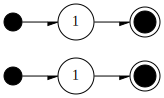

In [6]:
src

In [7]:
# Lower the mnemotrix resistance until it is below the threshold by activating both t. devices at the same time.
for i in range(0,5):
    sns1.feed([[1]])
    sns2.feed([[1]])
    #Update
    mng.update()

[1]
Thresholds at time 0 after the signal:             
[1, 0]
[1]
Thresholds at time 0 after the signal:             
[1, 1]
Threshold outputs at time 0
thr_54S9 --> mne_NKU5
thr_54S9 --> wire_NV5Z
thr_7TZB --| mne_NKU5
thr_7TZB --> wire_J0KX
Thresholds at time 0 after threshold update:                 
[0, 0]
Mnemotrix mne_NKU5 inputs : [1, 1], Current             resistance : (5/2) Resistance update                 time : (0/2) 
Mnemotrix mne_NKU5 , Current resistance :             (4/2) Resistance update time :                 (1/2) after MNE update.
Wire outputs at time 0
thr_54S9 --> act_IZ06 with : wire_NV5Z
thr_7TZB --> act_O6ZW with : wire_J0KX
Thresholds at time 0 after wire update:                 
[0, 0]
act_IZ06 : ACTIVATED 
act_O6ZW : ACTIVATED 
[1]
Thresholds at time 1 after the signal:             
[1, 0]
[1]
Thresholds at time 1 after the signal:             
[1, 1]
Threshold outputs at time 1
thr_54S9 --> mne_NKU5
thr_54S9 --> wire_NV5Z
thr_7TZB --| mne_NKU5
thr_7TZB 

In [8]:
# Activate only one t. device to see if mnemotrix connection activates the other.
for i in range(0,5):
    sns1.feed([[0]])
    sns2.feed([[1]])
    #Update
    mng.update()

[0]
[1]
Thresholds at time 5 after the signal:             
[0, 1]
Threshold outputs at time 5
thr_7TZB --| mne_NKU5
thr_7TZB --> wire_J0KX
Thresholds at time 5 after threshold update:                 
[0, 0]
Mnemotrix mne_NKU5 inputs : [0, 1], Current             resistance : (0/2) Resistance update                 time : (1/2) 
thr_54S9 --> mne_NKU5
thr_54S9 --> wire_NV5Z
thr_7TZB activated thr_54S9                             with :  mne_NKU5
Mnemotrix mne_NKU5 , Current resistance :             (0/2) Resistance update time :                 (2/2) after MNE update.
Wire outputs at time 5
thr_54S9 --> act_IZ06 with : wire_NV5Z
thr_7TZB --> act_O6ZW with : wire_J0KX
Thresholds at time 5 after wire update:                 
[0, 0]
act_IZ06 : ACTIVATED 
act_O6ZW : ACTIVATED 
[0]
[1]
Thresholds at time 6 after the signal:             
[0, 1]
Threshold outputs at time 6
thr_7TZB --| mne_NKU5
thr_7TZB --> wire_J0KX
Thresholds at time 6 after threshold update:                 
[0, 0]
Mnemotr